<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Definicija" data-toc-modified-id="Definicija-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Definicija</a></span><ul class="toc-item"><li><span><a href="#Nosilna-enačba" data-toc-modified-id="Nosilna-enačba-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Nosilna enačba</a></span></li><li><span><a href="#Simbolni-izračun" data-toc-modified-id="Simbolni-izračun-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Simbolni izračun</a></span><ul class="toc-item"><li><span><a href="#Masa" data-toc-modified-id="Masa-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Masa</a></span></li></ul></li><li><span><a href="#Izračun-tlaka" data-toc-modified-id="Izračun-tlaka-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Izračun tlaka</a></span></li><li><span><a href="#Koeficient-trenja" data-toc-modified-id="Koeficient-trenja-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Koeficient trenja</a></span></li></ul></li><li><span><a href="#ODE" data-toc-modified-id="ODE-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>ODE</a></span><ul class="toc-item"><li><span><a href="#Izračun-hitrosti-padanja" data-toc-modified-id="Izračun-hitrosti-padanja-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Izračun hitrosti padanja</a></span><ul class="toc-item"><li><span><a href="#Izris-rezultatov-izračuna" data-toc-modified-id="Izris-rezultatov-izračuna-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Izris rezultatov izračuna</a></span></li></ul></li></ul></li><li><span><a href="#Interpolacija" data-toc-modified-id="Interpolacija-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Interpolacija</a></span><ul class="toc-item"><li><span><a href="#Določitev-terminalne-hitrosti" data-toc-modified-id="Določitev-terminalne-hitrosti-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Določitev terminalne hitrosti</a></span></li></ul></li><li><span><a href="#Iskanje-ničel-funkcije" data-toc-modified-id="Iskanje-ničel-funkcije-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Iskanje ničel funkcije</a></span></li><li><span><a href="#Integriranje" data-toc-modified-id="Integriranje-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Integriranje</a></span></li><li><span><a href="#Aplikacija-in-strežnik" data-toc-modified-id="Aplikacija-in-strežnik-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Aplikacija in strežnik</a></span></li></ul></div>

Avtor: **Erazem Zver, 23130625**

Datum: 1. Junij 2019

*Potrjujem, da sem avtor projektne naloge in da sem vso vsebino pripravil sam. V primeru, da se ugotovi plagiatorstvo se zavedam, da ne bom izpolnjeval pogojev za pristop k izpitu.*

In [1]:
import numpy as np
import sympy as sym
import scipy as sp 
from scipy import integrate
import matplotlib.pylab as plt
%matplotlib inline
sym.init_printing()

Base input data

In [23]:
g0 = 9.81 #Gravitational acceleration [m/s^2]
rho = 7874 #Density of sphere [kg/m^3]
diam = 0.1 #Diameter of sphere [m]
height = 5000 #Height of tower [m]
samples = 500 #Number of points (resolution) [/]
duration = 50 #Duration of calculation [s]
y_points,y_step = np.linspace(0,duration,samples, retstep=True) #Points for sampling @TODO: does this need a +1 on number of samples?

# Definicija

<img src="padec.gif" width=450>

Namen projekta je pokazati lastnosti prostega pada. V tem končnem projektu bomo izvedli simulacijo telesa v prostem padu. S simbolnim računanjem bomo določili vse potrebne vstopne podatke, nato pa numerično določili obnašanje telesa v padcu.

Dodan je še spletni vmesnik, kateri je predstavljen na koncu poročila.

 - simbolno reševanje,
    - Prikaz izračuna v Jupyter Notebook
    - Določanje začetnih konstant
 - sistemi linearnih enačb,
     - ?
 - interpolacija ali aproksimacija,
     - določanje enačbe krivulje pospeška
 - iskanje ničel,
     - določanje terminalne hitrosti?
 - integriranje ali odvajanje,
     - določanje hitrosti in translacije iz interpolirane enačbe pospeška
 - reševanje diferencialnih enačb.
     - reševanje enačbe padca skozi zrak


## Nosilna enačba
Naša glavna enačba, iz katere bomo izhajali, je diferencialna enačba prostega pada.

$$m\ddot{y}+(\frac{1}{2}CA\rho)\dot{y}-mg=0$$

<h1>Kazalo<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Definicija" data-toc-modified-id="Definicija-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Definicija</a></span><ul class="toc-item"><li><span><a href="#Nosilna-enačba" data-toc-modified-id="Nosilna-enačba-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Nosilna enačba</a></span></li><li><span><a href="#Simbolni-izračun" data-toc-modified-id="Simbolni-izračun-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Simbolni izračun</a></span><ul class="toc-item"><li><span><a href="#Masa" data-toc-modified-id="Masa-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Masa</a></span></li></ul></li><li><span><a href="#Izračun-tlaka" data-toc-modified-id="Izračun-tlaka-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Izračun tlaka</a></span></li><li><span><a href="#Koeficient-trenja" data-toc-modified-id="Koeficient-trenja-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Koeficient trenja</a></span></li></ul></li><li><span><a href="#ODE" data-toc-modified-id="ODE-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>ODE</a></span><ul class="toc-item"><li><span><a href="#Izračun-hitrosti-padanja" data-toc-modified-id="Izračun-hitrosti-padanja-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Izračun hitrosti padanja</a></span><ul class="toc-item"><li><span><a href="#Izris-rezultatov-izračuna" data-toc-modified-id="Izris-rezultatov-izračuna-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Izris rezultatov izračuna</a></span></li></ul></li></ul></li><li><span><a href="#Interpolacija" data-toc-modified-id="Interpolacija-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Interpolacija</a></span><ul class="toc-item"><li><span><a href="#Določitev-terminalne-hitrosti" data-toc-modified-id="Določitev-terminalne-hitrosti-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Določitev terminalne hitrosti</a></span></li></ul></li><li><span><a href="#Iskanje-ničel-funkcije" data-toc-modified-id="Iskanje-ničel-funkcije-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Iskanje ničel funkcije</a></span></li><li><span><a href="#Integriranje" data-toc-modified-id="Integriranje-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Integriranje</a></span></li><li><span><a href="#Aplikacija-in-strežnik" data-toc-modified-id="Aplikacija-in-strežnik-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Aplikacija in strežnik</a></span></li></ul></div>

## Simbolni izračun

Želimo izračunati vstopne podatke in konstante za izračun diferencialne enačbe. Potrebujemo določiti:
    - Maso padajoče kroglje
    - Gostota plina skozi katerega pada kroglja
    - Konstanto zračnega upora 
$$k=\frac{1}{2}CA\rho$$

### Masa

Maso telesa v prostem padu bomo izračunali s pomočjo enostavne odvisnoti med gostoto in volumnom.

$$m = \rho*V$$
$$V = \frac{4}{3} *\pi*r^3$$
$$m = \frac{4}{3}*\rho*\pi*r^3 $$

In [3]:
from sympy import Rational
from sympy.solvers import solve

Nastavimo enačbo za izračun mase
- (Opomba: ta korak je tukaj nepotreben, pravzaprav je izračun mase s simbolnim računanjem nepotreben in brez razloga zakompliciran. V simulaciji je ubrana bolj smiselna bližnica z uporabo navadne funkcije.)

In [4]:
_m, _rho, _r = sym.symbols('m, rho, r')
eq = sym.Eq(_m, Rational(4,3)*_rho*sym.pi*_r**3)
eq

Vstavimo naše vstopne podatke in izračunamo maso.

In [5]:
m = solve(eq.subs({_rho:rho,_r:diam/2}),_m)
m

Določimo float število za nadaljne izračune

In [6]:
m = m[0].evalf()
print(f'Masa je {round(m,2)} kg')

Masa je 4.12 kg


## Izračun tlaka
Preden lahko izračunamo konstanto sile upora potrebujemo izračunati gostoto zraka. To lahko izračunamo iz plinske enačbe:
$$ p*V = \frac{m*R_u*T}{M} $$
in enakosti 
$$m = \rho*V$$

In [7]:
_p, _V, _rho, _R_u, _T, _M = sym.symbols('p, V, rho, R_u, T, M')
eq = sym.Eq(_p*_V,_rho*_V*_R_u*_T/_M)
eq

Iz enačbe izpostavimo gostoto

In [8]:
rho_air = solve(eq,_rho)
rho_air

Sedaj potrebujemo še konstante.

In [9]:
from scipy import constants

In [10]:
rho_air_value = rho_air[0].subs({
    _R_u:constants.R, #Plinska konstanta [ J mol^-1 K^-1]
    _M: 28.96/1000, # Molska masa zraka [kg/mol] - https://socratic.org/questions/what-is-the-molecular-weight-of-air
    _T: 20+273.15, #Temperatura okolice [K]
    _p: 1*10**5 #Tlak okolice [Pa]
}).evalf()
print(f'Gostota zraka je: {round(rho_air_value,2)} kg/m3') ##Gostota zraka [kg/m^3]

Gostota zraka je: 1.19 kg/m3


## Koeficient trenja
Potrebujemo izračunati še konstanto upora v naši enačbi hitrosti padanja. Izračunamo jo iz sledeče enačbe:

$$ F_u = -\frac{1}{2}*C*\rho*A*v^2 $$
Kjer je naša konstanta:
$$ k = \frac{1}{2}*C*\rho*A $$

C je praviloma določen izkustveno. Za sferične predmete je C v visko turbolentnem toku približno enak 0.1
(https://www.grc.nasa.gov/www/k-12/airplane/dragsphere.html)

In [11]:
_k, _C, _A, _v = sym.symbols('k, C, A v')
_k = 1/2*_C*_rho*_A*_v**2
_k

Preliminarno določimo k.

In [12]:
k = _k.subs({
    _C: 0.5,
    _A: sym.pi*(diam)**2/4,
    _rho: rho_air_value/1000,
    _v:100
}).evalf()
k

# ODE
## Izračun hitrosti padanja
Enačbo $$m\ddot{y}+(\frac{1}{2}CA\rho)\dot{y}-mg=0$$ bomo sedaj rešili s uporabo eulerjeve metode. Naš rezultat bo hitrost v smeri y.


$$ k = \frac{1}{2}*C*\rho*A $$

In [13]:
from scipy.integrate import solve_ivp

In [14]:
def returnK(v, rho, d, mu):
    # Konstante izračuna Cd ( https://www.researchgate.net/publication/244155878 )
    A=0.1806
    B=0.6459
    C=0.4251
    D=6880.95
    
    # Izračun Cd vključuje deljenje z hitrostjo. Ker je pri začetnem pogoju le-ta enaka 0 ji prištejemo nekaj zelo majhnega.   
    Re = d*v*rho/mu+0.000000001
    Cd = 24/Re*(1+A*Re**B)+C/(1+D/Re)
     #Izračun konstante
    k = ((np.pi*(d/2)**2)*Cd*rho)/2
    return k

In [15]:
def fun(x, y, g=9.81, m=30, d=0.1, rho=1.18/1000, mu=0.0000157):
    k = returnK(v = y[1], rho = rho, d = d, mu = mu)
    
    #Vrnjen vektor
    return np.array([y[1], g-k/m*y[1]**2])

In [16]:
def solveODE(m, rho_air_value, y_points, diam, height, g0):
    #Pogoj kdaj se izračun diferencialne enačbe konča
    tla = lambda x,y: height-y[0]
    tla.terminal = True
    tla.direction = -1

    #Numerični izračun rešitve
    res = solve_ivp(lambda t, y: fun(t, y, m=m, d=diam, rho=float(rho_air_value), g=g0), [y_points[0], y_points[-1]], y0=np.array([0,0]), t_eval=y_points,events=tla)
    y,v=res.y

    #Izračun pospeška
    a=fun(y_points,res.y,m=m, d=diam, rho=float(rho_air_value),g=g0)[1]

    return a,v,y, res.t

In [24]:
a,v,y,t = solveODE(m = m, rho_air_value=(rho_air_value), y_points=y_points, diam=diam, height=height, g0=g0)

In [26]:
#Trajanje padca iz višine {height}
print(f'Trajanje padca: {round(t[-1],2)}s')

#Število vzorcev
print(f'Število vzorcev: {len(t)}, korak dt: {round(t[-1]/len(t),3)}s')

Trajanje padca: 45.89s
Število vzorcev: 459, korak dt: 0.1s


### Izris rezultatov izračuna
V naslednjih tabelah lahko vidimo izrisane profile predmeta v padcu. Odziv ustreza pričakovanemu, s hitrostjo se manjša pospešek, saj v diferencialni enačbi s hitrostjo narašča vpliv člena `k`. Na neki točki je le-ta dovolj velik da ustavi pospeševanje. Tu je dosežena terminalna hitrost.

Text(0.5, 1.0, 'Translation')

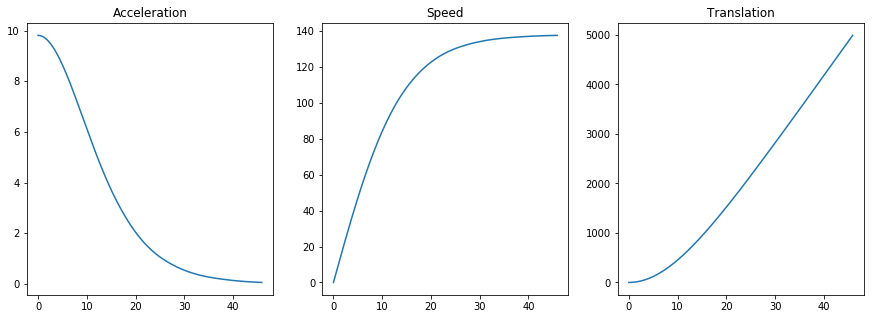

In [25]:
fig, axs  = plt.subplots(1, 3,figsize=(15,5))
axs[0].plot(t, a)
axs[0].set_title('Acceleration')
axs[1].plot(t, v)
axs[1].set_title('Speed')
axs[2].plot(t, y)
axs[2].set_title('Translation')

# Interpolacija 
## Določitev terminalne hitrosti

Sedaj bomo s pomočjo interpolacije točk pospeševanja določili kdaj funkcija začne limitirati proti 0. Takrat vemo, da smo dosegli terminalno hitrost.

Najprej določimo naše zlepke polinomov

In [27]:
from scipy.interpolate import InterpolatedUnivariateSpline

In [28]:
spl = InterpolatedUnivariateSpline(t, a, k=3)

Text(0.5, 1.0, 'Interpolated Translation')

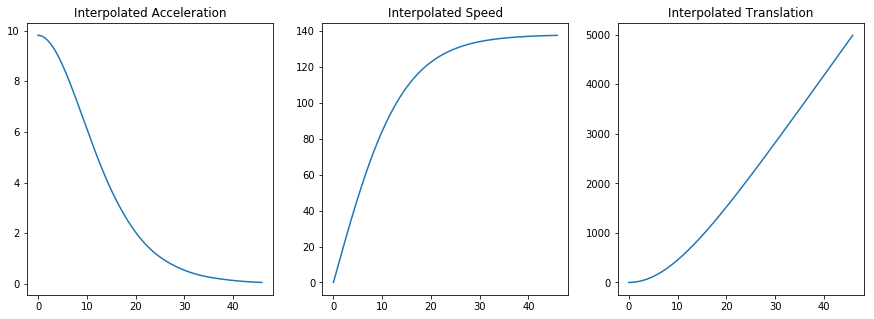

In [29]:
fig, axs  = plt.subplots(1, 3,figsize=(15,5))
axs[0].plot(t, spl(t))
axs[0].set_title('Interpolated Acceleration')
axs[1].plot(t, spl.antiderivative(1)(t))
axs[1].set_title('Interpolated Speed')
axs[2].plot(t, spl.antiderivative(2)(t))
axs[2].set_title('Interpolated Translation')

Sedaj lahko s pomočjo integracije določimo še prepotovano pot.

In [ ]:
print(f'Prepotovana pot padca je: {round(spl.antiderivative(1).integral(0,res.t[-1]),2)}m')

# Iskanje ničel funkcije

Kot je na grafu razvidno, lahko opazimo, da začne funkcija pospeška nihati okoli ničle. To lahko izkoristimo, da najdemo prvo ničlo ter tam določimo terminalno hitrost.

In [ ]:
from scipy.optimize import newton

In [ ]:
print(f'Prva ničla se nahaja pri: {round(newton(spl, 5, maxiter=50),2)}s')
print(f'Terminalna hitrost je: {round(float(spl.antiderivative(1)(21)), 2)} m/s')

# Integriranje
Tu bomo s pomočjo integrala določili opravljeno translacijo.

In [ ]:
#TODO

# Aplikacija in strežnik 

Poročilu je dodan še strežnik in spletni klijent za uporabo strežnika. Le-tega je potrebno pognati s pomočjo zunanje orodne vrstice (CMD, Anaconda Prompt, Powershell....), saj jupyter ne podpira izvajanja strežniške kode.

Prav take je so pravilno delovanje potrebna PIP paketa python-socketio in aiohttp, ter spremljajoče odvisnosti. 
Te lahko naložite z uporabo ukaza `$ pip install -r requirements.txt` iz root mape tega projekta. T.j. lokacija tega jupyter notebooka.

Nato se program požene s pomočjo ukaza `$ python app.py`. V spletnem brskalniku se lahko na strežnik povežete preko naslova `http://localhost:8080`



V primeru, da ne želite nalagati vseh PIP paketov, oz. iz kakšnega razloga aplikacija ne deluje so v mapi `/slike` priložene slike, ki prikažejo delovanje aplikacije.